In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import math

import pickle
from tqdm import tqdm
import os

from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.drop_duplicates(keep='first',inplace=True)

In [ ]:
y=data.output.values
x=data.drop(["output"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
x.shape,X_train.shape,X_test.shape

((302, 13), (241, 13), (61, 13))

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
model1=SGDClassifier()
model2=LogisticRegression()
model3=DecisionTreeClassifier()
model4=KNeighborsClassifier()
model5 = xgb.XGBClassifier()
model6=LinearSVC()
meta=LogisticRegression()

In [ ]:
grid_values = {'loss':['log','hinge'],'penalty':['l1','l2'],'alpha':np.logspace(-50,50,101)}
clf = GridSearchCV(model1, grid_values, cv=2, scoring='roc_auc', return_train_score=True)
clf.fit(X_train, y_train)
clf.best_estimator_,clf.best_score_

(SGDClassifier(alpha=0.1, penalty='l1'), 0.7700680101177613)

In [ ]:
grid_values = {'penalty':['l1','l2'],'C':np.logspace(-50,50,101)}
clf = GridSearchCV(model2, grid_values, cv=2, scoring='roc_auc', return_train_score=True)
clf.fit(X_train, y_train)
clf.best_estimator_,clf.best_score_

(LogisticRegression(C=100000.0), 0.8773640216426286)

In [ ]:
grid_values = {'min_samples_split':np.arange(1,1000,50),'max_depth':np.arange(2,10)}
clf = GridSearchCV(model3, grid_values, cv=2, scoring='roc_auc', return_train_score=True)
clf.fit(X_train, y_train)
clf.best_estimator_,clf.best_score_


(DecisionTreeClassifier(max_depth=8, min_samples_split=51), 0.7617572909861468)

In [ ]:
grid_values = {'n_neighbors':np.arange(2,20)}
clf = GridSearchCV(model4, grid_values, cv=2, scoring='roc_auc', return_train_score=True)
clf.fit(X_train, y_train)
clf.best_estimator_,clf.best_score_

(KNeighborsClassifier(n_neighbors=18), 0.7052647117945625)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
grid_values = {'learning_rate': np.logspace(-5,5,11) ,'n_estimators' : np.arange(10,1000,50)}
clf = GridSearchCV(model5, grid_values, cv=2, scoring='roc_auc', return_train_score=True)
clf.fit(X_train, y_train)
clf.best_estimator_,clf.best_score_

(XGBClassifier(n_estimators=310), 0.8804881317319129)

In [ ]:
grid_values = {'penalty':['l1','l2'],'C':np.logspace(-50,50,101)}
clf = GridSearchCV(model6, grid_values, cv=2, scoring='roc_auc', return_train_score=True)
clf.fit(X_train, y_train)
clf.best_estimator_,clf.best_score_

(LinearSVC(C=1e+50), 0.8912047506574869)

In [ ]:
model1=SGDClassifier(alpha=0.1, loss='log', penalty='l1')
model1.fit(X_train,y_train)
model2=LogisticRegression(C=100000.0)
model2.fit(X_train,y_train)
model3=DecisionTreeClassifier(max_depth=8, min_samples_split=51)
model3.fit(X_train,y_train)
model4=KNeighborsClassifier(n_neighbors=18)
model4.fit(X_train,y_train)
model5 = xgb.XGBClassifier(learning_rate=0.01, max_depth=2, n_estimators=310)
model5.fit(X_train,y_train)
model6=LinearSVC(C=100.0)
model6.fit(X_train,y_train)
meta=LogisticRegression()

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingClassifier

sclf = StackingClassifier(classifiers=[model1, model2, model3, model4, model5, model6], meta_classifier=meta)

In [ ]:
from sklearn import model_selection
for clf, label in zip([model1, model2, model3, model4, model5, model6,sclf], 
                      ['SGD', 
                       'Logistic Regression', 
                       'DecisionTreeClassifier',
                       'KNeighborsClassifier', 
                       'XGBClassifier', 
                       'DecisionTreeClassifier',
                       'LinearSVC']):

    scores = model_selection.cross_val_score(clf, X_train, y_train, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

Accuracy: 0.62 (+/- 0.05) [SGD]
Accuracy: 0.81 (+/- 0.04) [Logistic Regression]
Accuracy: 0.72 (+/- 0.03) [DecisionTreeClassifier]
Accuracy: 0.66 (+/- 0.04) [KNeighborsClassifier]
Accuracy: 0.82 (+/- 0.03) [XGBClassifier]
Accuracy: 0.73 (+/- 0.05) [DecisionTreeClassifier]
Accuracy: 0.81 (+/- 0.03) [LinearSVC]


In [ ]:
sclf.fit(X_train,y_train)

StackingClassifier(classifiers=[SGDClassifier(alpha=0.01, loss='log',
                                              penalty='l1'),
                                LogisticRegression(C=100000000000000.0),
                                DecisionTreeClassifier(max_depth=2,
                                                       min_samples_split=51),
                                KNeighborsClassifier(n_neighbors=19),
                                XGBClassifier(learning_rate=0.01, max_depth=2,
                                              n_estimators=260),
                                LinearSVC(C=100.0)],
                   meta_classifier=LogisticRegression())

In [ ]:
from sklearn.metrics import accuracy_score
print ("accuracy with model 1 is :"+str(accuracy_score(y_test,model1.predict(X_test))))
print ("accuracy with model 2 is :"+str(accuracy_score(y_test,model2.predict(X_test))))
print ("accuracy with model 3 is :"+str(accuracy_score(y_test,model3.predict(X_test))))
print ("accuracy with model 4 is :"+str(accuracy_score(y_test,model4.predict(X_test))))
print ("accuracy with model 5 is :"+str(accuracy_score(y_test,model5.predict(X_test))))
print ("accuracy with model 6 is :"+str(accuracy_score(y_test,model6.predict(X_test))))
print ("accuracy with ensemble is :"+str(accuracy_score(y_test,sclf.predict(X_test))))

accuracy with model 1 is :0.8032786885245902
accuracy with model 2 is :0.8852459016393442
accuracy with model 3 is :0.8032786885245902
accuracy with model 4 is :0.7049180327868853
accuracy with model 5 is :0.8524590163934426
accuracy with model 6 is :0.8360655737704918
accuracy with ensemble is :0.8524590163934426


as accuracy of ensemble is no better than model6 lets compare confusion and auc roc 

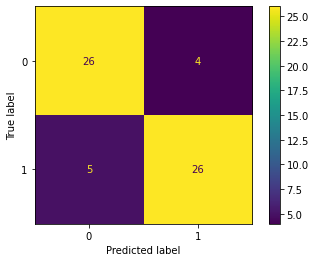

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(sclf,X_test,y_test)

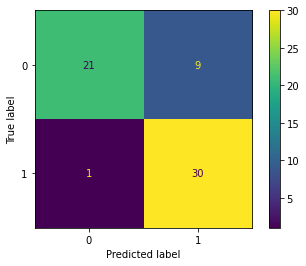

In [ ]:
plot_confusion_matrix(model6,X_test,y_test)

In [ ]:
roc_auc_score(y_test, sclf.predict(X_test))

0.8526881720430108

In [ ]:
roc_auc_score(y_test, model6.predict(X_test))

0.8338709677419355

thus in auc roc curve we came to know that ensemble is performing better
but ensemble will consume much configurations and i can trade with model6 here

### Lets predict

In [ ]:
g=[28,1,1,138,170,0,1,140,2.0,1,3,2,1]
g=np.array(g)
model6.predict(g.reshape(1,-1))

array([0])

In [ ]:
g=[58,1,1,178,210,0,1,210,4.0,1,3,2,1]
g=np.array(g)
model6.predict(g.reshape(1,-1))

array([1])

In [ ]:
import joblib
joblib.dump(model6,'model6.pkl') 

['model6.pkl']